# Quality prediction of white wine and red wine based on physicochemical tests


## 1. Introduction


   Wine is an alcoholic beverage made from grapes. White wine and red wine are two variants of wine that is widely known. Red wine is made from dark-colored grape varieties, while white wine is made from non-colored grape pulp (source: Wikipedia https://en.wikipedia.org/wiki/Wine). Physicochemical properties, such as pH and acidity,  influence the tasting and quality of wine. We will focus on predicting the quality of white wine and red wine based on results of physicochemical tests.
Two separated datasets will be used in this research, which are related to red and white variants of the Portuguese "Vinho Verde" wine. One contains 11 physicochemical parameters (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,  sulphates, alcohol) and the quality index (0-10), the other contains the data of red wine.


## 2. Methods and results

*describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.*

 %% loads data from the original source on the web 


In [39]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")
install.packages("GGally")
library(e1071)
library(GGally)
install.packages("gridExtra")
library(gridExtra)
install.packages("ROSE")
library(ROSE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loaded ROSE 0.0-3



In [25]:
# Import Red wine data
red_data <- read.csv("winequality-red.csv", sep = ";") 
head(red_data)
# Import white wine data
white_data <- read.csv("winequality-white.csv", sep = ";")
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [5]:
# See the distribution of quality level
red_data %>% 
    group_by(quality) %>%
    summarize(n = n()) 
nrow(red_data)
white_data %>%
    group_by(quality) %>%
    summarize(n=n()) 
nrow(white_data)


quality,n
3,10
4,53
5,681
6,638
7,199
8,18


[1] 1599

quality,n
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


[1] 4898

From the table above we can see that every observation has a quality level (i.e. no observation with quality unknown).

%% wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned classification or clustering analysis

In [32]:
red_data_is_na <- red_data %>% 
    filter(is.na(-quality)) 
red_data_is_na
white_data_is_na <- white_data %>% 
    filter(is.na(-quality)) 
white_data_is_na

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality


No N/A in our datasets.

 - Red wine

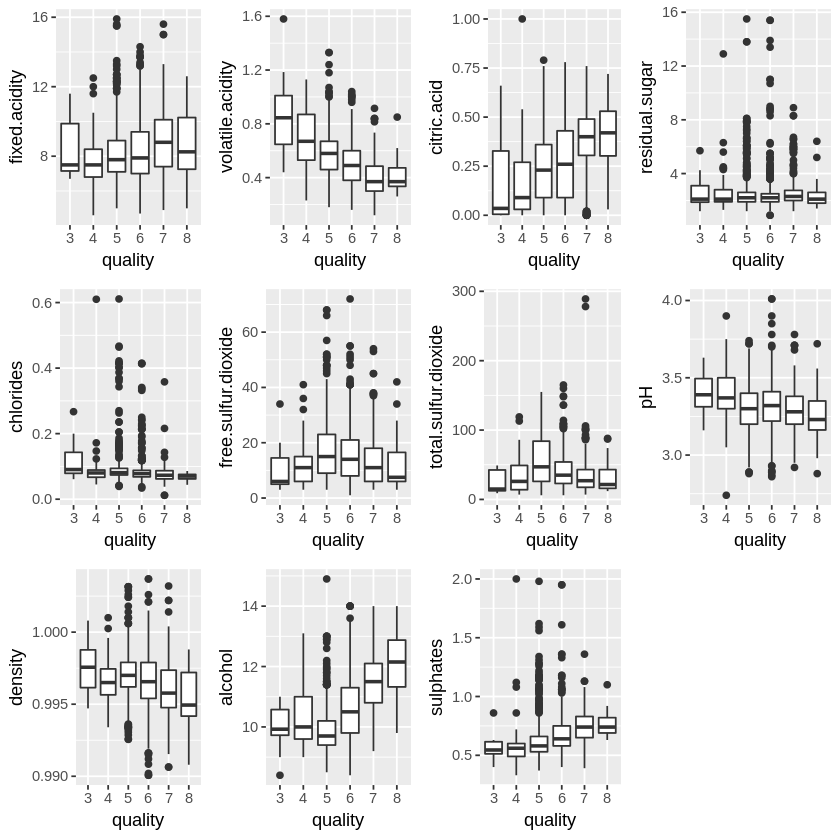

In [40]:
red_data_quality_factor <- red_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()


grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4)

%% good predictors to use for red wine 
- volatile acidity 
- citric acid 
- alcohol

 - White wine

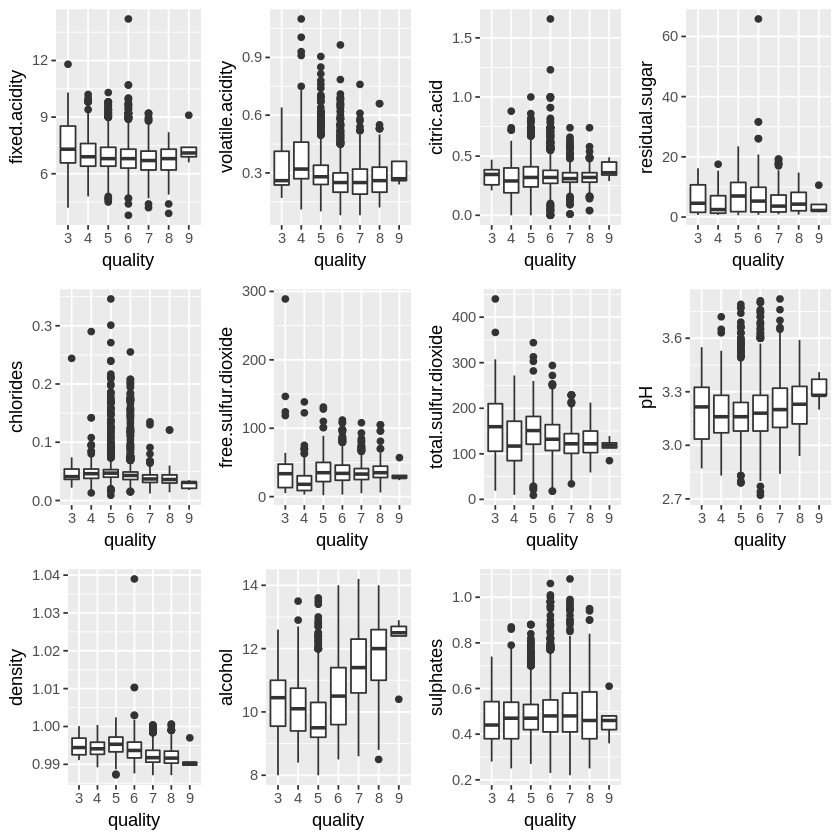

In [42]:
white_data_quality_factor <- white_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()

grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4)

%% Good predictors to use for white wine 
- residual sugar 
- density 
- alcohol

In [4]:
# Scale the data
red_scaled <- red_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 
red_scaled <- data.frame(quality = red_data$quality, red_scaled)
head(red_scaled)
white_scaled <- white_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 
white_scaled <- data.frame(quality = white_data$quality, white_scaled)
head(white_scaled)

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.9173862,1.578412,0.0000000,0.8950914,0.9864165,1.3147233,1.1765782,0.9997389,0.9650922,1.0002557,0.9350642
5,0.9173862,1.363174,0.1198329,0.7918116,0.9260236,0.7888340,0.9482869,0.9999395,0.9831877,0.9561268,0.9350642
6,1.3172725,0.502222,1.6776605,0.6541052,0.7549106,0.8940119,1.0536521,1.0009425,0.9530286,0.8531593,0.9350642
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.8703407,1.183809,0.0000000,0.6196787,0.7549106,0.6836561,0.7024347,1.0007419,1.0585855,0.8237400,0.8968984


quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
6,1.0134309,0.9122795,1.0127692,2.5367895,0.8871633,1.1481392,1.1744078,1.0069072,0.9398009,0.8946063,0.8311998
6,0.9120878,1.0136438,0.9565042,0.1960804,0.9660223,0.3571989,0.9118931,0.9998658,1.0337810,0.9741268,0.8973179
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906


%% performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification, regression or clustering analysis 

%%  creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification or clustering analysis

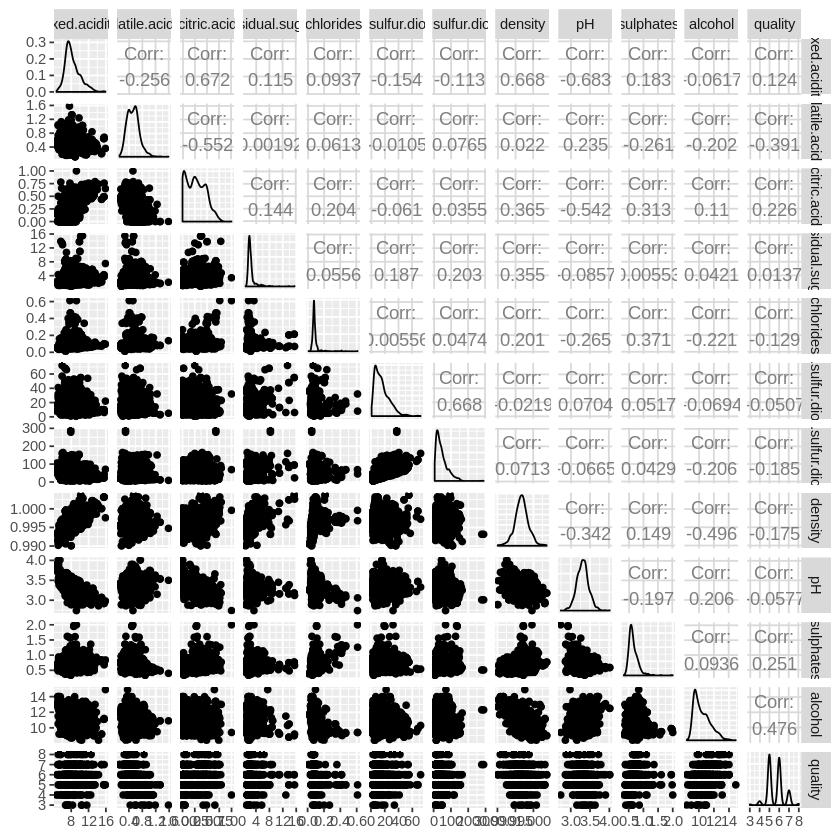

In [7]:
red_plot <- red_data %>% 
    ggpairs()
red_plot

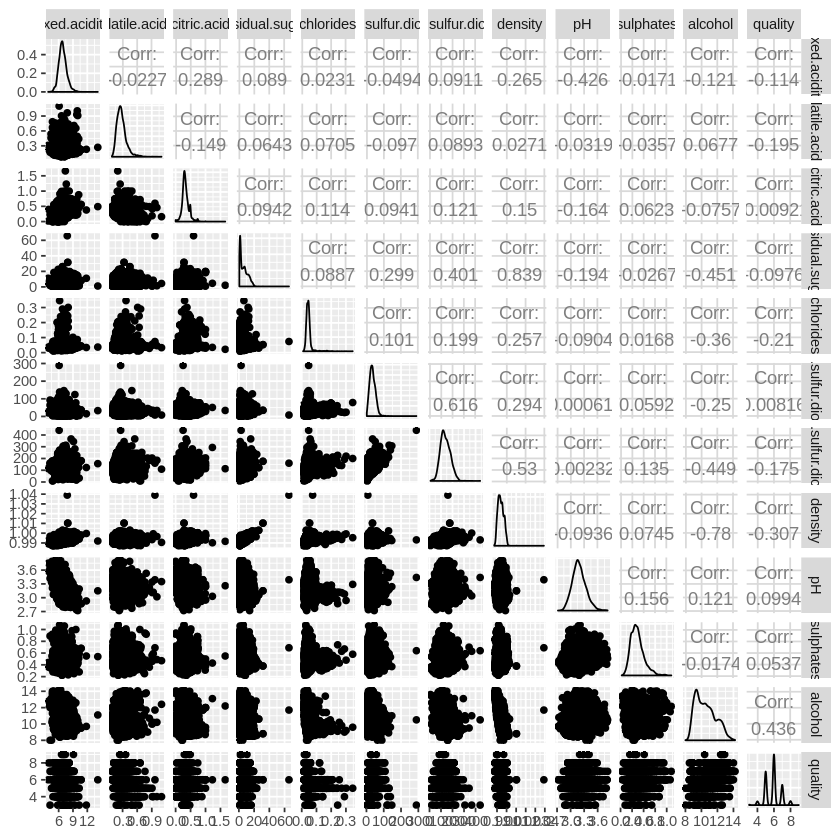

In [34]:
white_plot <- white_data %>%
    ggpairs()
white_plot

%% performs either a classification, regression or clustering analysis

In [ ]:
set.seed(2019)

In each section below, we may need the following: 
 - RMSE
 - RMSPE 
 - best k in knn regression
 - coefficients in linear regression 

### 2.1  Knn Regression 

 - Red Wine

%% using every single predictor on the scaled data set for a regression model

In [45]:
set.seed(100)

training_set <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- red_scaled %>% 
    select(-quality) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- red_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- red_scaled %>% 
    select(-quality) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

%% cross validation to choose best value of k

In [47]:
train_control <- trainControl(method = "cv", number = 10)

k_red = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_red, trControl = train_control)

knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1151, 1153, 1154, 1153, 1154, 1153, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.8124676  0.2493679  0.4762712
    2  0.7397708  0.2543619  0.5176747
    3  0.7296030  0.2409207  0.5428868
    4  0.7147257  0.2450661  0.5421199
    5  0.7104142  0.2436661  0.5435043
    6  0.7010704  0.2531200  0.5419983
    7  0.6951262  0.2623665  0.5393181
    8  0.6892024  0.2710172  0.5392407
    9  0.6873481  0.2723267  0.5402965
   10  0.6855910  0.2746418  0.5420654
   11  0.6836070  0.2775976  0.5436146
   12  0.6844928  0.2746324  0.5430471
   13  0.6832340  0.2763872  0.5430850
   14  0.6805893  0.2817562  0.5412721
   15  0.6790537  0.2848859  0.5405561
   16  0.6819086  0.2791608  0.5440680
   17  0.6824926  0.2778427  0.5448145
   18  0.6848415  0.2728720  0.5469856
   19  0.6861463  0.2703572  0.5488219


%% best k is k = 20, forming the final model with k = 13

In [49]:
k_best_red <- data.frame(k = 15)
knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best_red)
knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1281, 1281, 1281, 1281, 1281, 1281, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7035439  0.2458549  0.5581315

Tuning parameter 'k' was held constant at a value of 15

%% Testing the model on the test data

In [51]:
test <- predict(knn_red, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,5,5.466667
quality2,5,5.400000
quality3,5,5.470588
quality4,5,5.133333
quality5,5,5.800000
quality6,4,5.200000
quality7,5,5.562500
quality8,6,5.466667
quality9,5,5.266667
quality10,6,5.200000


RMSE  Rsquared       MAE 
0.6895984 0.3226301 0.5506844

The RMSE is 0.689598362218414 for using all predictors on the scaled data

 - White Wine

%% Using every predictors for the scaled white wine data

In [53]:
training_set <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(-quality) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(-quality) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

Choosing cross validation to choose the best value of k 

In [54]:
train_control <- trainControl(method = "cv", number = 10)

k_white = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white, trControl = train_control)

knn_white

k-Nearest Neighbors 

3919 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3528, 3527, 3528, 3528, 3527, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.8305911  0.3062856  0.4886209
    2  0.7814851  0.3005119  0.5499719
    3  0.7594589  0.3044268  0.5617952
    4  0.7446676  0.3118773  0.5591891
    5  0.7413559  0.3099400  0.5616395
    6  0.7371416  0.3109692  0.5636515
    7  0.7363412  0.3083828  0.5659880
    8  0.7354951  0.3076141  0.5653929
    9  0.7341534  0.3086643  0.5644948
   10  0.7329936  0.3096950  0.5653996
   11  0.7326423  0.3093788  0.5671552
   12  0.7327011  0.3088805  0.5693532
   13  0.7317762  0.3102252  0.5692635
   14  0.7295832  0.3139706  0.5688058
   15  0.7319395  0.3091532  0.5717208
   16  0.7332977  0.3067020  0.5737588
   17  0.7327038  0.3081899  0.5727422
   18  0.7339006  0.3063762  0.5740893
   19  0.7345218  0.3051839  0.5742630


Forming the model with k = 12

In [ ]:
k_best <- data.frame(k = 12)
knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white

In [ ]:
test <- predict(knn_white, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

### 2.2. Linear Regression

 - Red Wine

 - White Wine

 %% creates a visualization of the classification, regression  or clustering analysis 

### * 2.3 Knn Regression with selected variables

citric acid levels, residual sugar levels, chlorides, sulphur dioxide percentage, sulphates and alcohol 

## 3. Discussion

%% summarize what you found  

%% discuss whether this is what you expected to find? 

%% discuss what impact could such findings have?

%% discuss what future questions could this lead to?

## 4. Reference

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
Wikipedia contributors. (2019, February 12). Wine. In Wikipedia, The Free Encyclopedia. Retrieved 10:38, March 2, 2019, from https://en.wikipedia.org/w/index.php?title=Wine&oldid=882957942
